In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import plotly.express as px 
import plotly.graph_objects as go
from scipy.signal import find_peaks
from scipy import interpolate

In [8]:
data = pd.read_csv('C:\\Users\\bagir\\Downloads\\2025-03-20_18-17-32_266_rcms.csv')

In [9]:
data

,TIME_s,RHEO_1_mΩ,BASE_1_Ω,ECG_V,RHEO_2_mΩ,BASE_2_Ω,QS_1_Ω,QS_2_Ω
0,0.000,-104.647,47.072,0.019,-3.897,30.988,1110.0,1110.0
1,0.005,-109.738,47.063,0.021,-3.115,30.988,1091.0,1091.0
2,0.010,-114.829,47.055,0.023,-2.332,30.988,1073.0,1073.0
3,0.015,-119.921,47.046,0.026,-1.550,30.988,1054.0,1054.0
4,0.020,-125.012,47.038,0.028,-0.767,30.989,1036.0,1036.0
...,...,...,...,...,...,...,...,...
388320,1941.600,95.003,43.775,-0.045,-6.905,25.066,1663.0,1663.0
388321,1941.605,95.575,43.775,-0.036,-6.345,25.066,1666.0,1666.0
388322,1941.610,96.147,43.776,-0.027,-5.785,25.066,1669.0,1669.0
388323,1941.615,96.719,43.776,-0.018,-5.225,25.066,1672.0,1672.0


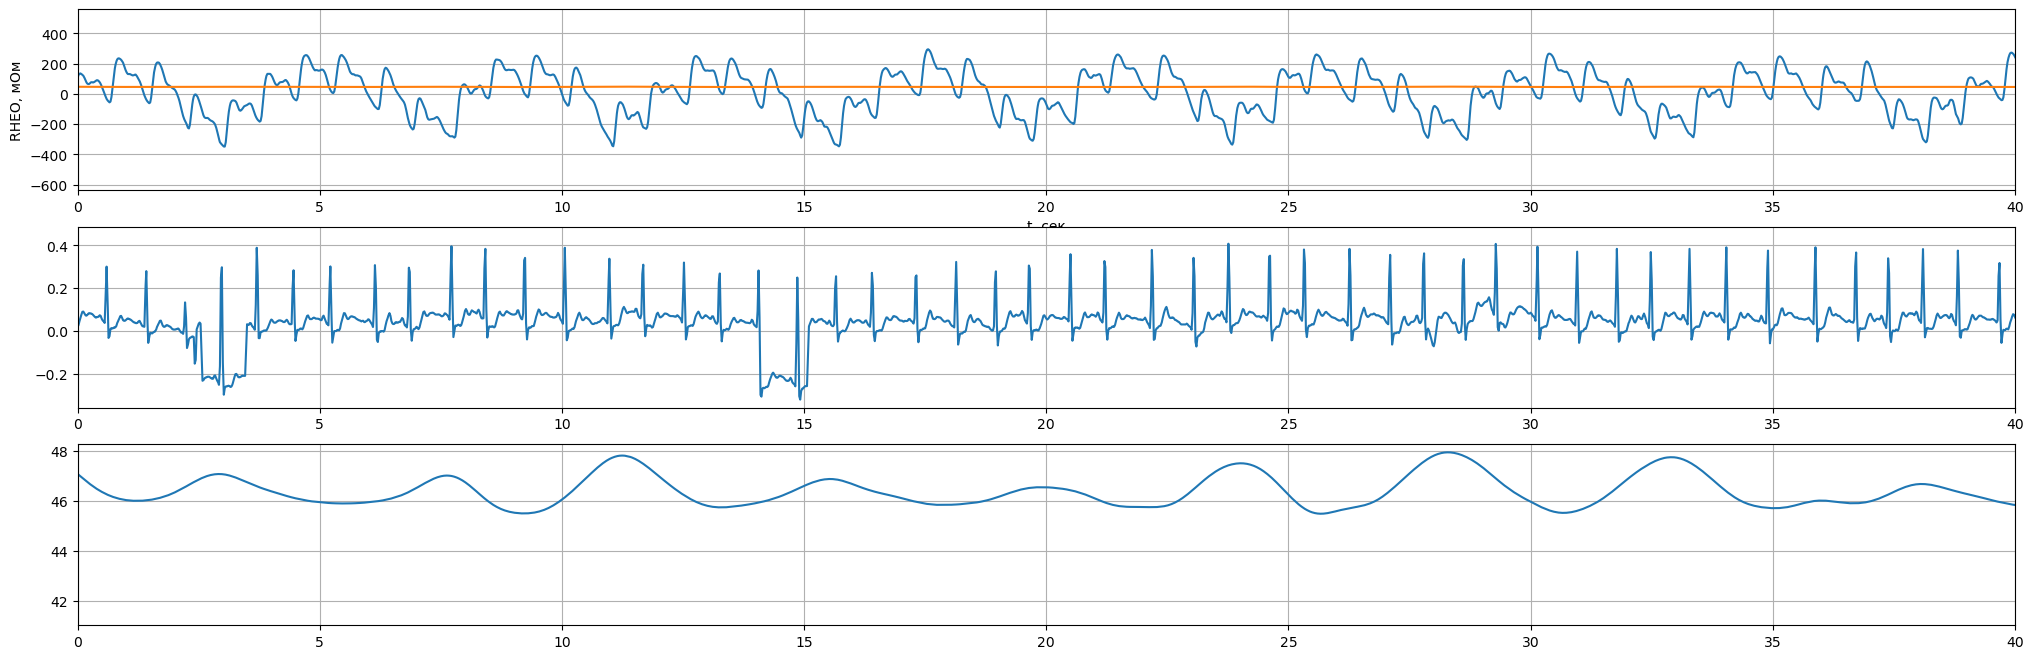

In [10]:
f = plt.figure()
f.set_figwidth(25)
f.set_figheight(8)
left =0;
right=40;

#plt.plot(data.TIME_s, data.RHEO_1_mΩ, data.TIME_s, data.ECG_V)
plt.subplot(3, 1, 1)
plt.plot(data.TIME_s, -data.RHEO_1_mΩ, data.TIME_s, data.BASE_1_Ω)
plt.xlim([left, right])
plt.xlabel("t, сек")
plt.ylabel("RHEO, мОм")
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(data.TIME_s, data.ECG_V)
plt.xlim([left, right])
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(data.TIME_s, data.BASE_1_Ω)
plt.xlim([left, right])
plt.grid(True)

In [11]:
#поиск частоты дыхания по базовому импедансу
R, _ =find_peaks(data.BASE_1_Ω)

(0.0, 20000.0)

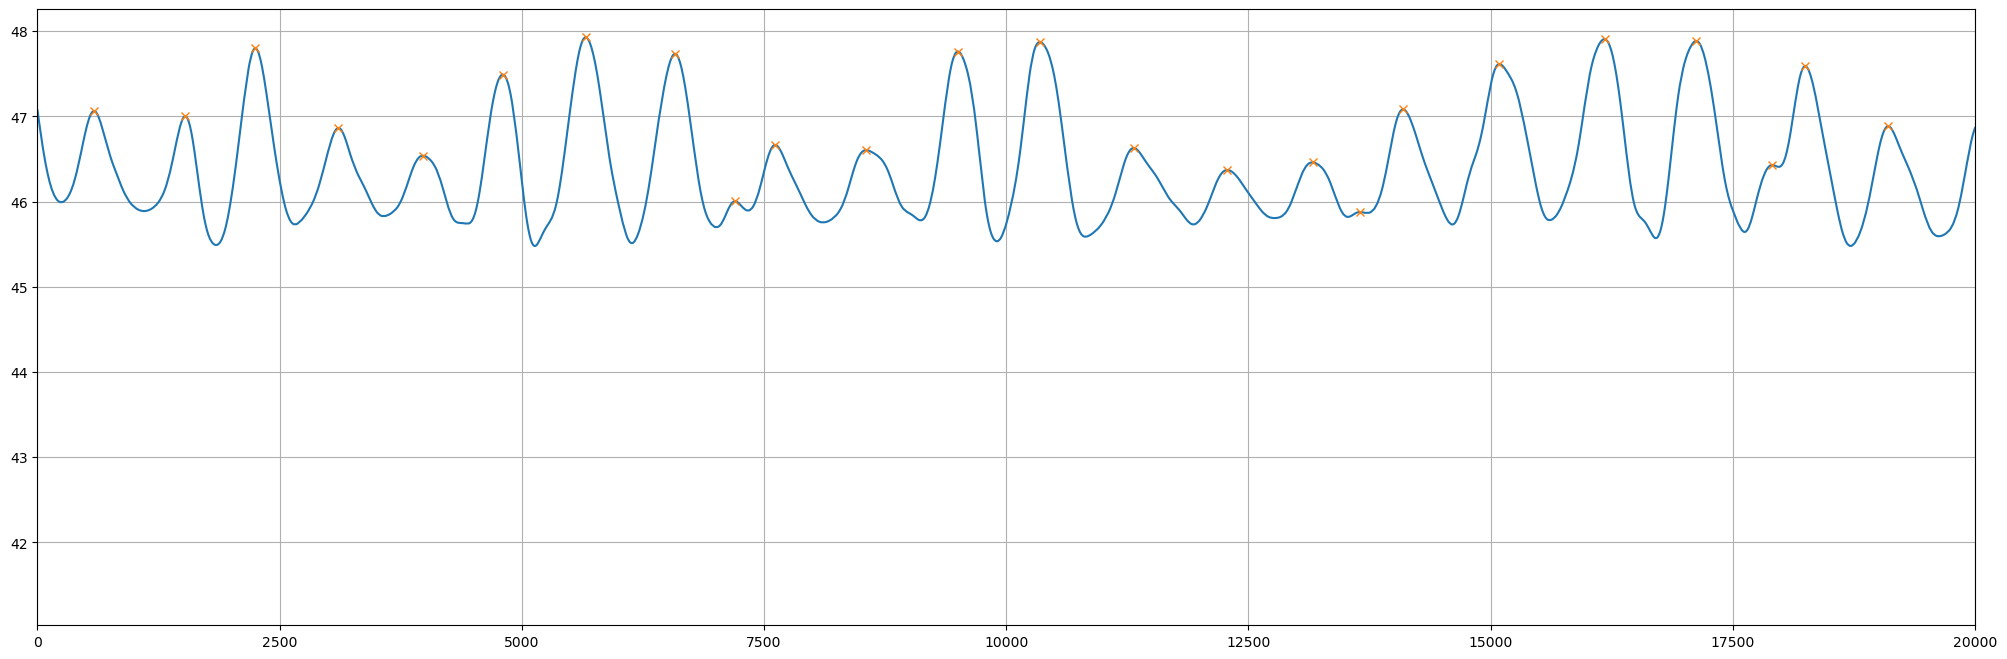

In [12]:
f = plt.figure()
f.set_figwidth(25)
f.set_figheight(8)

plt.plot(data.BASE_1_Ω)
plt.plot(R, data.BASE_1_Ω[R], 'x')
#plt.plot(R, data.BASE_1_Ω[R], color='red')
plt.grid(True)

plt.xlim([0, 20000])


In [13]:
#расчет дастоты дыхания
a=len(R)/data.TIME_s[len(data.TIME_s)-1]
a

0.26421235875197

In [14]:
#Фильтрация сигнала
from scipy.signal import butter, filtfilt

In [15]:
#режекторный фильтр
def bandstop_filter(data, lowcut, highcut, fs, order):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='bandstop', analog=False)
    y = filtfilt(b, a, data)
    return y

In [16]:
# Параметры фильтра
fs = 1/data.TIME_s[1]  # Частота дискретизации
order = 3  # Порядок фильтра Баттерворта

(0.0, 55.0)

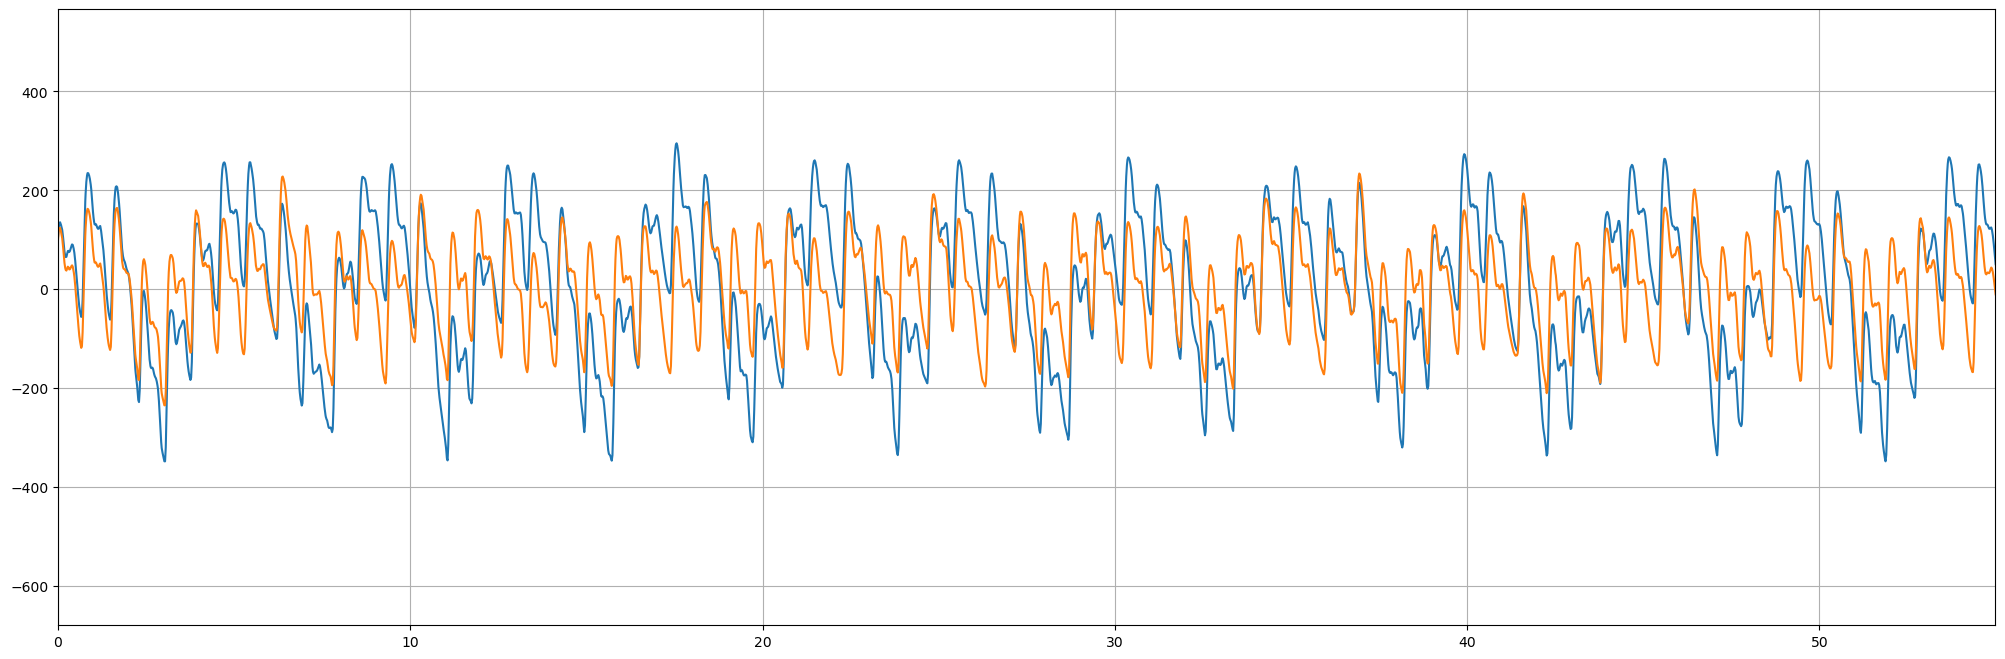

In [18]:
q=bandstop_filter(-data.RHEO_1_mΩ, a-0.06, a+0.06, fs, order)

f = plt.figure()
f.set_figwidth(25)
f.set_figheight(8)

plt.plot(data.TIME_s, -data.RHEO_1_mΩ, data.TIME_s, q)
#plt.plot(q)
plt.grid(True)
plt.xlim([left, 55])

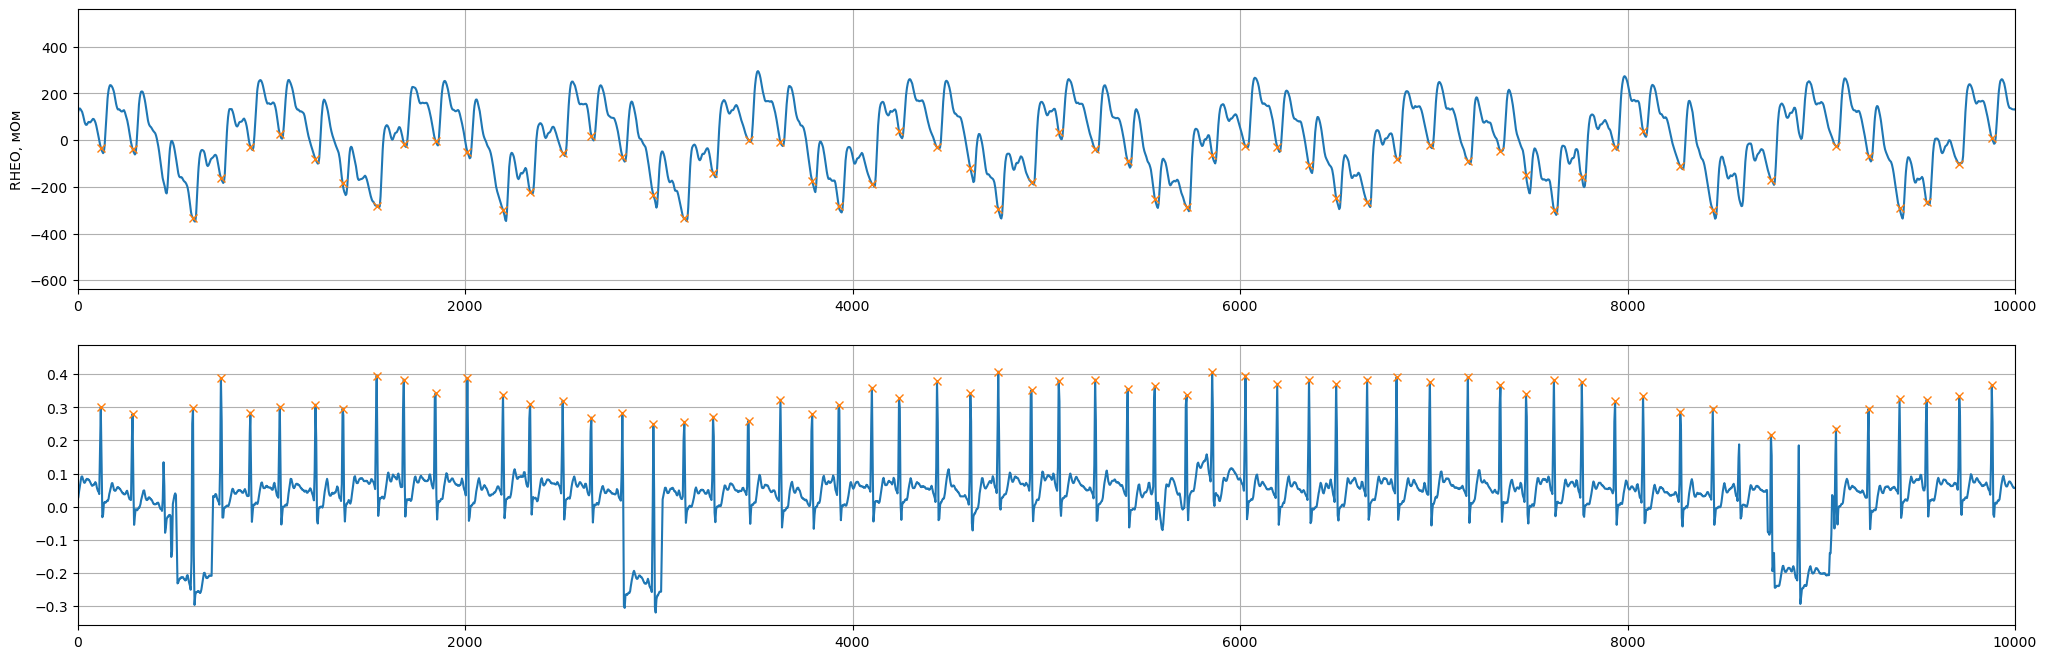

In [28]:
#поиск точек на pq интервале
p, _ =find_peaks(data.ECG_V, height=0.2)

f = plt.figure()
f.set_figwidth(25)
f.set_figheight(8)

right=10000

plt.subplot(2, 1, 1)
plt.plot(-data.RHEO_1_mΩ)
plt.plot(p, -data.RHEO_1_mΩ[p], 'x')
plt.xlim([left, right])
#plt.xlabel("t, сек")
plt.ylabel("RHEO, мОм")
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(data.ECG_V)
plt.plot(p, data.ECG_V[p], 'x')
plt.xlim([left, right])
plt.grid(True)


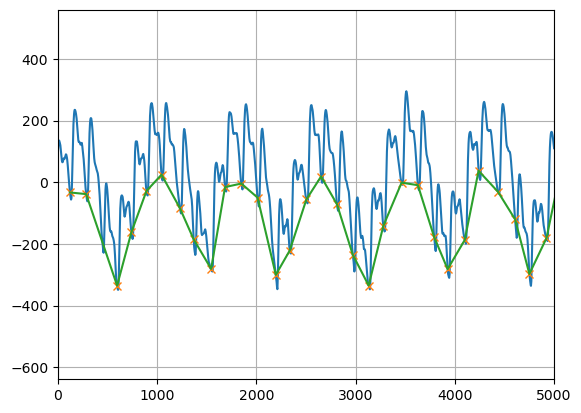

In [42]:
#кубический сплайн
spline=interpolate.CubicSpline(p, -data.RHEO_1_mΩ[p])

plt.plot(-data.RHEO_1_mΩ)
plt.plot(p, -data.RHEO_1_mΩ[p], 'x')
plt.plot(p, spline(p))

plt.xlim([left, 5000])

plt.grid(True)

In [53]:
#полученного значений сплайна для всех отсчетов сигнала реограммы
spline_delete=spline(np.arange(len(data.RHEO_1_mΩ)))
spline_delete

array([-377.02078775, -372.47110124, -367.95297185, ...,  -68.61639169,
        -67.7051731 ,  -66.77817544])

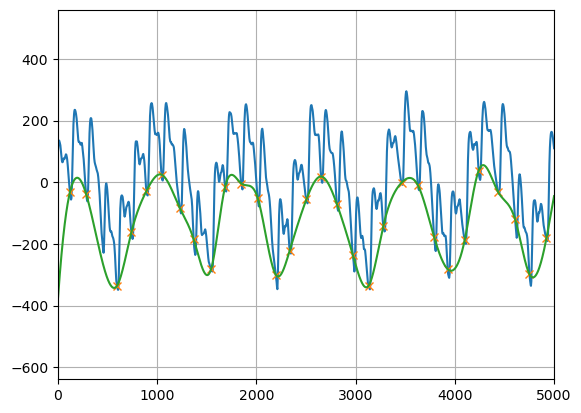

In [54]:
plt.plot(-data.RHEO_1_mΩ)
plt.plot(p, -data.RHEO_1_mΩ[p], 'x')

#plt.plot(p, spline(p))
plt.plot(spline_delete)
         
plt.xlim([left, 5000])
plt.grid(True)

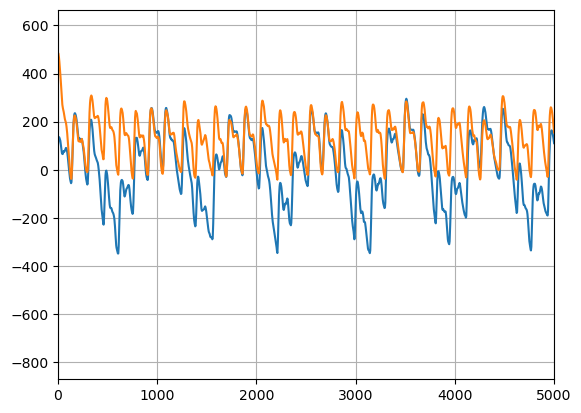

In [55]:
#удаление полученного сплайна из сигнала реограммы
new=-data.RHEO_1_mΩ-spline_delete

plt.plot(-data.RHEO_1_mΩ)
#plt.plot(p, -data.RHEO_1_mΩ[p], 'x')

#plt.plot(p, spline(p))
#plt.plot(spline_delete)

plt.plot(new)
         
plt.xlim([left, 5000])
plt.grid(True)